In [1]:
from numpy import mean , std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [3]:
df = read_csv('horse-colic.csv', header=None , na_values='?')

In [4]:
data = df.values

In [5]:
ix = [i for i in range(data.shape[1]) if i != 23]

In [6]:
X, y = data[:, ix] , data[:, 23]

In [7]:
results = list()

In [8]:
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]

In [9]:
strategies

['1', '3', '5', '7', '9', '15', '18', '21']

In [11]:
for s in strategies:
    pipeline = Pipeline([('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>1 0.864 (0.054)
>3 0.859 (0.051)
>5 0.864 (0.055)
>7 0.863 (0.054)
>9 0.862 (0.051)
>15 0.866 (0.054)
>18 0.856 (0.060)
>21 0.863 (0.054)


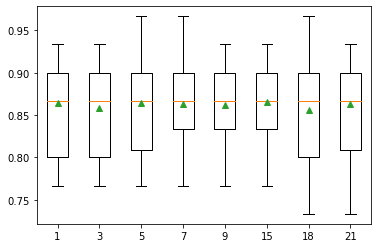

In [13]:
pyplot.boxplot(results, labels = strategies, showmeans=True)
pyplot.show()